# Computer Vision - Assignment 2
### Harshavardhan P
### 2021111003

In [1]:
import numpy
import cv2
import matplotlib.pyplot as plt
import torch
from torchvision import datasets, transforms
import tqdm
import torch.nn as nn

/Users/harshavardhan/anaconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Dataset

In [2]:
# load the mnist dataset with torch
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.MNIST('mnist', download=True, train=True, transform=transform)
testset = datasets.MNIST('mnist', download=True, train=False, transform=transform)

# print the number of images in the sets
print('Number of training images:', len(trainset))
print('Number of test images:', len(testset))

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Number of training images: 60000
Number of test images: 10000


## Model

In [3]:
# building the LeNet CNN model for predicting the MNIST dataset
class LeNet(torch.nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = torch.nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.conv2 = torch.nn.Conv2d(6, 16, kernel_size=5, stride=1, padding=0)
        self.fc1 = torch.nn.Linear(16*5*5, 120)
        self.fc2 = torch.nn.Linear(120, 84)
        self.fc3 = torch.nn.Linear(84, 10)
        self.relu = torch.nn.ReLU()
        self.pool = torch.nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 16*5*5)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

loss=0.0352: 100%|██████████| 938/938 [00:33<00:00, 28.33it/s]



Test set: Avg. loss: 0.0011, Accuracy: 9777/10000 (98%)



loss=0.0270: 100%|██████████| 938/938 [00:34<00:00, 27.39it/s]



Test set: Avg. loss: 0.0007, Accuracy: 9840/10000 (98%)



loss=0.0443: 100%|██████████| 938/938 [00:31<00:00, 29.52it/s]



Test set: Avg. loss: 0.0008, Accuracy: 9837/10000 (98%)



loss=0.2555: 100%|██████████| 938/938 [00:30<00:00, 30.62it/s]



Test set: Avg. loss: 0.0007, Accuracy: 9858/10000 (99%)



loss=0.0337: 100%|██████████| 938/938 [00:28<00:00, 33.44it/s]



Test set: Avg. loss: 0.0006, Accuracy: 9893/10000 (99%)



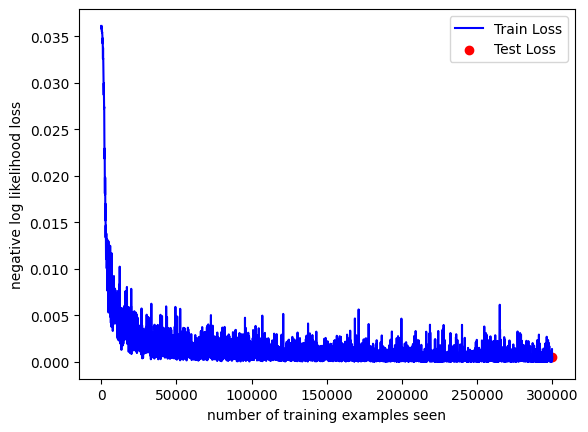

In [4]:
# train the model on the training dataset
model = LeNet()
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

n_epochs = 5
train_losses = []
train_counter = []
test_losses = []
test_counter = [(i+1) * len(trainloader.dataset) for i in range(n_epochs)]

def train(epoch):
    model.train()
    pbar = tqdm.tqdm(trainloader)
    for batch_idx, (data, target) in enumerate(pbar):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= 'loss={:.4f}'.format(loss.item()))
        train_losses.append(loss.item() / 64)
        train_counter.append(
            (batch_idx*64) + ((epoch-1)*len(trainloader.dataset)))

def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(testloader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

# plot the training and test losses
plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
plt.show()